In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/kaggle/input/machine-predictive-maintenance-classification/predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [6]:
df.apply(lambda x: x.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [7]:
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [8]:
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

In [9]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [10]:
df.drop(df.columns[:2],axis=1,inplace=True)
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [11]:
from sklearn .preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['Type_encoded'] = encoder.fit_transform(df['Type'])
df['Failure_Type_encoded'] = encoder.fit_transform(df['Failure Type'])
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_encoded,Failure_Type_encoded
0,M,298.1,308.6,1551,42.8,0,0,No Failure,2,1
1,L,298.2,308.7,1408,46.3,3,0,No Failure,1,1
2,L,298.1,308.5,1498,49.4,5,0,No Failure,1,1
3,L,298.2,308.6,1433,39.5,7,0,No Failure,1,1
4,L,298.2,308.7,1408,40.0,9,0,No Failure,1,1


In [13]:
df.drop(df[['Type']],axis=1,inplace=True)
df.drop(df[['Failure Type']],axis=1,inplace=True)

In [14]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded,Failure_Type_encoded
0,298.1,308.6,1551,42.8,0,0,2,1
1,298.2,308.7,1408,46.3,3,0,1,1
2,298.1,308.5,1498,49.4,5,0,1,1
3,298.2,308.6,1433,39.5,7,0,1,1
4,298.2,308.7,1408,40.0,9,0,1,1


<Axes: >

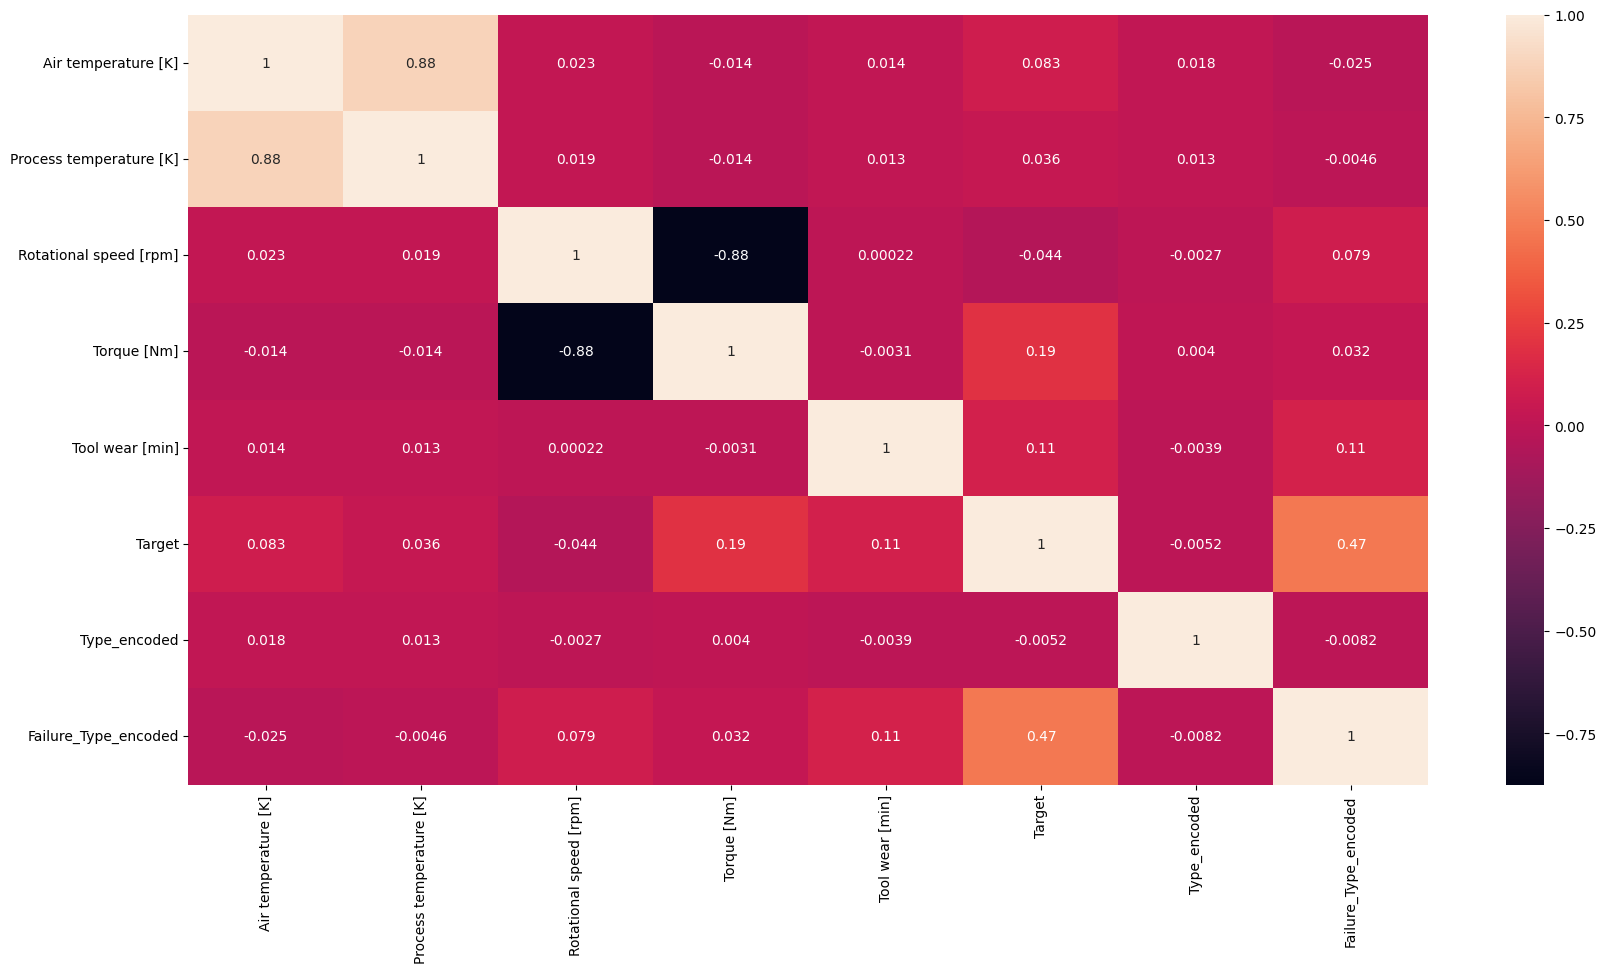

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

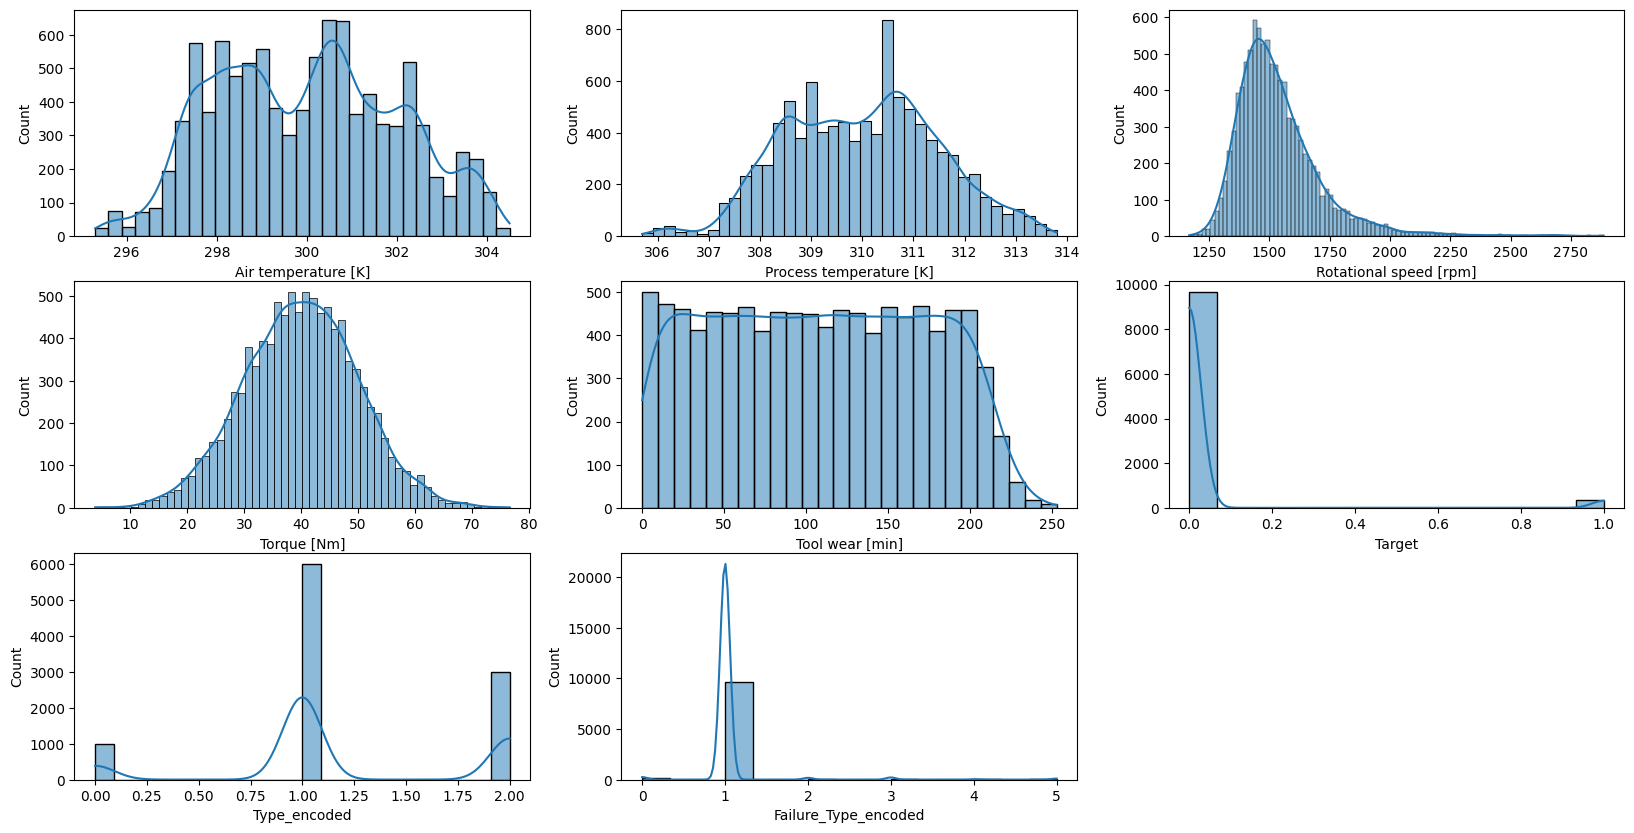

In [16]:
plt.figure(figsize=(20,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

In [17]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_encoded,Failure_Type_encoded
0,298.1,308.6,1551,42.8,0,0,2,1
1,298.2,308.7,1408,46.3,3,0,1,1
2,298.1,308.5,1498,49.4,5,0,1,1
3,298.2,308.6,1433,39.5,7,0,1,1
4,298.2,308.7,1408,40.0,9,0,1,1


In [18]:
df.drop(df[['Target']],axis=1,inplace=True)

In [19]:
df.columns = df.columns.str.replace('[\[\]<> ]', '_', regex=True)
print(df.columns)

Index(['Air_temperature__K_', 'Process_temperature__K_',
       'Rotational_speed__rpm_', 'Torque__Nm_', 'Tool_wear__min_',
       'Type_encoded', 'Failure_Type_encoded'],
      dtype='object')


In [20]:
df.head()

,Air_temperature__K_,Process_temperature__K_,Rotational_speed__rpm_,Torque__Nm_,Tool_wear__min_,Type_encoded,Failure_Type_encoded
0,298.1,308.6,1551,42.8,0,2,1
1,298.2,308.7,1408,46.3,3,1,1
2,298.1,308.5,1498,49.4,5,1,1
3,298.2,308.6,1433,39.5,7,1,1
4,298.2,308.7,1408,40.0,9,1,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature__K_      10000 non-null  float64
 1   Process_temperature__K_  10000 non-null  float64
 2   Rotational_speed__rpm_   10000 non-null  int64  
 3   Torque__Nm_              10000 non-null  float64
 4   Tool_wear__min_          10000 non-null  int64  
 5   Type_encoded             10000 non-null  int64  
 6   Failure_Type_encoded     10000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 547.0 KB


In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Failure_Type_encoded"])
y = df["Failure_Type_encoded"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(max_iter=500, class_weight='balanced')
logreg.fit(X_train_scaled, y_train)


y_pred_lr = logreg.predict(X_test_scaled)


log_train = round(logreg.score(X_train_scaled, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("y_pred_lr     :", y_pred_lr, "%")
print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

y_pred_lr     : [5 0 1 ... 4 3 1] %
Training Accuracy    : 63.41 %
Model Accuracy Score : 63.7 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.18      1.00      0.31        15
           1       1.00      0.63      0.77      1935
           2       0.22      1.00      0.36        13
           3       0.40      0.90      0.55        20
           4       0.00      0.17      0.00         6
           5       0.04      0.73      0.08        11

    accuracy                           0.64      2000
   macro avg       0.31      0.74      0.35      2000
weighted avg       0.97      0.64      0.76      2000

--------------------------------------------------------


In [36]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(class_weight='balanced')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision.fit(X_train_scaled, y_train)
y_pred_dec = decision.predict(X_test_scaled)

decision_train = round(decision.score(X_train_scaled, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("y_pred_dec     :", y_pred_dec)
print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

y_pred_dec     : [1 1 1 ... 1 3 1]
Training Accuracy    : 100.0 %
Model Accuracy Score : 97.25 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.99      0.99      0.99      1935
           2       0.55      0.85      0.67        13
           3       0.60      0.45      0.51        20
           4       0.00      0.00      0.00         6
           5       0.12      0.09      0.11        11

    accuracy                           0.97      2000
   macro avg       0.49      0.53      0.50      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


In [37]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(class_weight='balanced')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

decision.fit(X_train_scaled, y_train)
y_pred_dec = decision.predict(X_test_scaled)

decision_train = round(decision.score(X_train_scaled, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("y_pred_dec     :", y_pred_dec , "%")
print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

y_pred_dec     : [1 1 1 ... 1 3 1] %
Training Accuracy    : 100.0 %
Model Accuracy Score : 97.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.99      0.99      0.99      1935
           2       0.53      0.77      0.62        13
           3       0.62      0.50      0.56        20
           4       0.00      0.00      0.00         6
           5       0.22      0.18      0.20        11

    accuracy                           0.97      2000
   macro avg       0.51      0.54      0.52      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


decision = DecisionTreeClassifier(class_weight='balanced')
decision.fit(X_train, y_train)


y_pred_dec = decision.predict(X_test)


decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("y_pred_dec    :", y_pred_dec, "%")
print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")


y_pred_dec    : [1 1 1 ... 1 3 1] %
Training Accuracy    : 100.0 %
Model Accuracy Score : 97.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        15
           1       0.99      0.99      0.99      1935
           2       0.55      0.85      0.67        13
           3       0.62      0.50      0.56        20
           4       0.00      0.00      0.00         6
           5       0.12      0.09      0.11        11

    accuracy                           0.97      2000
   macro avg       0.50      0.53      0.50      2000
weighted avg       0.97      0.97      0.97      2000

--------------------------------------------------------


In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_XGB = xgb_model.predict(X_test)

# Calculate training and test accuracies
XGBClassifier_train = round(xgb_model.score(X_train, y_train) * 100, 2)
XGBClassifier_accuracy = round(accuracy_score(y_pred_XGB, y_test) * 100, 2)

# Print the results


print("y_pred_XGB     :", y_pred_XGB, "%")
print("Training Accuracy    :", XGBClassifier_train, "%")
print("Model Accuracy Score :", XGBClassifier_accuracy, "%")
print("--------------------------------------------------------")
print("Classification_Report: \n", classification_report(y_test, y_pred_XGB))
print("--------------------------------------------------------")


y_pred_XGB     : [1 1 1 ... 1 3 1] %
Training Accuracy    : 100.0 %
Model Accuracy Score : 98.2 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.99      1.00      0.99      1935
           2       0.69      0.85      0.76        13
           3       0.80      0.60      0.69        20
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00        11

    accuracy                           0.98      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.97      0.98      0.98      2000

--------------------------------------------------------


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
